Q1 : What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?
-  Ensemble techniques combine multiple models to improve predictive performance, reduce variance, and minimize overfitting compared to a single model. Bagging (Bootstrap Aggregating) involves training several independent models in parallel on random subsets of the data and averaging their predictions, which reduces variance. Boosting builds models sequentially, where each model tries to correct the errors of the previous one, focusing on difficult cases, thus reducing both variance and bias. The key difference: bagging relies on parallel, independent learners to average out errors, while boosting builds dependent learners serially to adaptively improve on errors


Q 2: Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.
-  Random Forest reduces overfitting by creating an ensemble of decision trees, each trained on different data and feature subsets, thus aggregating their predictions. Two key hyperparameters are:​

   Number of trees (n_estimators): More trees lead to better generalization, reducing overfitting.

   Maximum features (max_features): Randomly selecting features prevents trees from becoming too similar, further minimizing overfitting.

Q 3: What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.
- Stacking is an ensemble strategy where predictions from multiple base models (level 0) are fed into a meta-model (level 1) that learns how to optimally combine them. Unlike bagging/boosting (which use averaging or sequential correction), stacking uses a separate model to blend base model outputs. For example, combining logistic regression, decision tree, and SVM predictions using a linear regression meta-model for final output.

Q 4:What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?
-  The Out-Of-Bag (OOB) score in Random Forest is a validation method where each tree is tested on data not seen during its training (bootstrap samples only select a subset). This provides a reliable, built-in estimate of model performance without needing a separate validation set and helps efficiently detect overfitting.


Q 5: Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases
- Weak Learner Errors
AdaBoost
Focuses on mistakes of prior learner

Gradient Boosting
Fits new learner to residual errors

Weight Adjustment
AdaBoost
Raises weights of misclassified
Gradient Boosting
Learner fits new model to current error

Use Cases
AdaBoost
Binary/multiclass classification
Gradient Boosting
Versatile: classification, regression

Question 6:Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.
- CatBoost handles categorical variables natively by converting categories using target statistics and unique ordered boosting, reducing data leakage and the need for one-hot encoding. This makes CatBoost highly efficient and accurate for datasets with many categorical features without heavy preprocessing


Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.


In [24]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load data
data = load_wine()
X, y = data.data, data.target

# Train/test split 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN classifier k=5 without scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Metrics without scaling
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Without scaling - Accuracy:", acc)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN with scaling
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Metrics with scaling
acc_scaled = accuracy_score(y_test, y_pred_scaled)
print("With scaling - Accuracy:", acc_scaled)

# GridSearch for best k and metric
param_grid = {'n_neighbors': list(range(1, 21)), 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best params:", grid.best_params_)

# Final evaluation with best params
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
acc_best = accuracy_score(y_test, y_pred_best)
print("Best model accuracy:", acc_best)


Without scaling - Accuracy: 0.7407407407407407
With scaling - Accuracy: 0.9629629629629629
Best params: {'metric': 'manhattan', 'n_neighbors': 1}
Best model accuracy: 0.9629629629629629


Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).

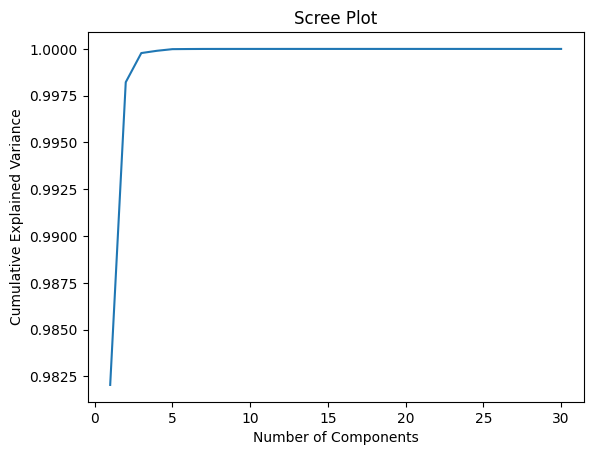

Accuracy original data: 0.9590643274853801
Accuracy PCA reduced data: 0.9532163742690059


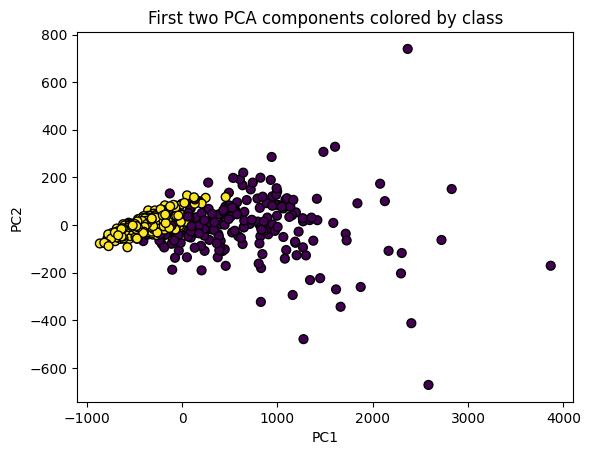

In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

# Plot explained variance for components (using a full PCA for this plot)
pca_full_variance = PCA().fit(X)
plt.plot(range(1, len(pca_full_variance.explained_variance_ratio_)+1), pca_full_variance.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

# Select components explaining 95% variance for KNN model training
pca_95 = PCA(n_components=0.95)
X_pca_for_knn = pca_95.fit_transform(X) # This X_pca_for_knn might have 1 component if 95% variance is explained by 1 PC

# KNN classifier on original and PCA data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train, y_train)
acc_orig = knn_orig.score(X_test, y_test)

# Split the PCA-transformed data (from 95% variance retention) for KNN
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_for_knn, y, test_size=0.3, random_state=42)
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_pca)
acc_pca = knn_pca.score(X_test_pca, y_test_pca)

print("Accuracy original data:", acc_orig)
print("Accuracy PCA reduced data:", acc_pca)

# Visualize the first two principal components.
# We need to ensure we have at least 2 components for this plot.
# Create a new PCA specifically for plotting with n_components=2.
pca_for_plot = PCA(n_components=2)
X_pca_for_plot = pca_for_plot.fit_transform(X)

# The following scatter plot will now correctly access two columns if n_components=2 was successful
plt.scatter(X_pca_for_plot[:, 0], X_pca_for_plot[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First two PCA components colored by class')
plt.show()

Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.


MSE Euclidean: 4803.90558674207
MSE Manhattan: 5210.225816542467


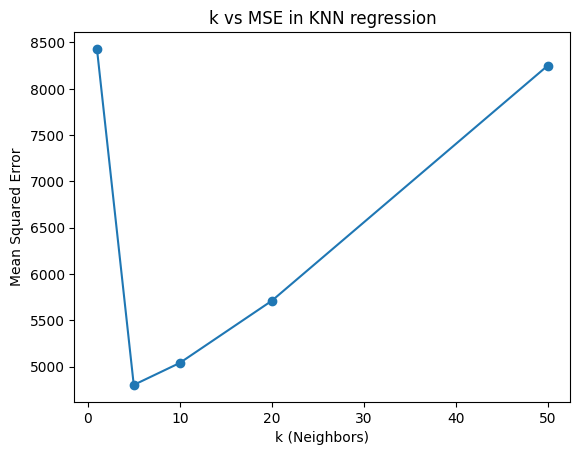

In [30]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN regressor for Euclidean and Manhattan metrics
knn_euc = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_man = KNeighborsRegressor(n_neighbors=5, metric='manhattan')

knn_euc.fit(X_train, y_train)
knn_man.fit(X_train, y_train)

y_pred_euc = knn_euc.predict(X_test)
y_pred_man = knn_man.predict(X_test)

print("MSE Euclidean:", mean_squared_error(y_test, y_pred_euc))
print("MSE Manhattan:", mean_squared_error(y_test, y_pred_man))

# Effect of varying k on MSE
ks = [1, 5, 10, 20, 50]
mses = []

for k in ks:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mses.append(mean_squared_error(y_test, y_pred))

plt.plot(ks, mses, marker='o')
plt.xlabel("k (Neighbors)")
plt.ylabel("Mean Squared Error")
plt.title("k vs MSE in KNN regression")
plt.show()


Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).
Dataset: Pima Indians Diabetes


Algorithm: brute, Training Time: 0.0022 sec, Accuracy: 0.7100
Algorithm: kd_tree, Training Time: 0.0028 sec, Accuracy: 0.7100
Algorithm: ball_tree, Training Time: 0.0026 sec, Accuracy: 0.7100

Best Algorithm: brute


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


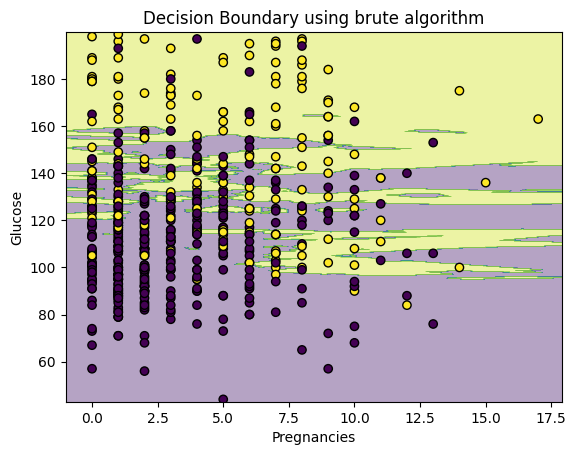

In [29]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from time import time
import matplotlib.pyplot as plt
import numpy as np

# Load diabetes.txt file
file_path = "diabetes.txt"
df = pd.read_csv(file_path)

# Replace zeros with NaN in specified columns and convert to float for imputation compatibility
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    df[col] = df[col].replace(0, np.nan).astype(float)

# Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Separate features and target
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate KNN classifiers with different algorithms
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = {}

for algo in algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start = time()
    knn.fit(X_train, y_train)
    train_time = time() - start
    accuracy = knn.score(X_test, y_test)
    results[algo] = (train_time, accuracy)

# Print results for all algorithms
for algo, (t, acc) in results.items():
    print(f"Algorithm: {algo}, Training Time: {t:.4f} sec, Accuracy: {acc:.4f}")

# Identify best algorithm by accuracy
best_algo = max(results, key=lambda k: results[k][1])
print(f"\nBest Algorithm: {best_algo}")

# Train best model on first two features for decision boundary plotting
knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
knn_best.fit(X_train.iloc[:, :2], y_train)

# Create mesh grid for decision boundary plot
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolor='k')
plt.xlabel('Pregnancies')
plt.ylabel('Glucose')
plt.title(f'Decision Boundary using {best_algo} algorithm')
plt.show()
